# Esercitazione di Laboratorio n. 5

#### Autore: Davide Cernuzio

### Parte II: Oscillatore Armonico Smorzato

Alla forza totale agente sul corpo concorrono la forza elastica e quella di attrito viscoso (se l'oscillatore è posto su un piano orizzontale, i contributi $m\vec{g}$ e $\vec{N}$ si compensano):

$m \vec{a} = \vec{f}_{el} + \vec{f}_{AV}$

$\hat{i}: \;\; m a_x = -k x - \beta v$

$\displaystyle \ddot{x} = -\frac{k}{m} x - \frac{\beta}{m} \dot{x}$

$\displaystyle \ddot{x} + \gamma \; \dot{x} + \omega_0^2 \; x = 0$

$\displaystyle \gamma \equiv \frac{\beta}{m}, \;\;\; \omega_0^2 \equiv \frac{k}{m}$

Usare il metodo di Runge-Kutta per risolvere l'equazione nei seguenti casi:

- 1. $\beta^2 < 4km$: sottosmorzamento;
- 2. $\beta^2 = 4km$: smorzamento critico;
- 3. $\beta^2 > 4km$: sovrasmorzamento

con $m = 1\; kg$, $k = 1 \; N/m$ e $\beta$ che viene fatto variare in modo da verificare i tre casi $ \left( \beta \gtreqqless 2 \; kg/s \right)$. Graficare le soluzioni numeriche $x(t), \; v(t), \; q(t) \ vs \ p(t)$ e le energie cinetica e potenziale $K(t), U(t)$. Discutere i risultati.

Il sistema in forma normale ridotto al prim'ordine è

$\begin{cases} \displaystyle \frac{dx}{dt} = v \\ \\ \displaystyle \frac{dv}{dt} = F(t,x,v) \equiv -\omega_0^2x - \gamma v \end{cases}$

Poste le condizioni iniziali $x(0) = x_0, v(0) = v_0$, ricordiamo che le soluzioni analitiche nei tre casi sono:

- 1. sottosmorzamento:

    $\displaystyle x(t) = e^{-t/\tau} \left[ x_0 \cos \omega t + \frac{x_0 + v_0 \tau}{\omega \tau} \sin \omega t \right] \\
    \displaystyle v(t) = e^{-t/\tau} \left[ v_0 \cos \omega t - \frac{1}{\omega \tau}\left( v_0 + \frac{1 + \omega^2\tau^2}{\tau} x_0 \right) \sin \omega t \right]$

- 2. smorzamento critico:

    $\displaystyle x(t) = e^{-t/\tau} \left[ x_0 + \left( \frac{x_0}{\tau} + v_0 \right) t \right] \\
     \displaystyle v(t) = e^{-t/\tau} \left[ v_0 - \left( \frac{x_0}{\tau} + v_0 \right) \frac{t}{\tau} \right]$

- 3. sovrasmorzamento:
    
    $\displaystyle x(t) = e^{-t/\tau} \left[ x_0 \cosh \omega t + \frac{x_0 + v_0 \tau}{\omega \tau} \sinh \omega t \right] \\
    \displaystyle v(t) = e^{-t/\tau} \left[ v_0 \cosh \omega t - \frac{1}{\omega \tau} \left( v_0 + \frac{1 - \omega^2\tau^2}{\tau} x_0 \right) \sinh \omega t \right]$

ove $\displaystyle \tau = \frac{2}{\gamma} = \frac{2m}{\beta}, \; \omega = \sqrt{ \Big| \omega_0^2 - \frac{\gamma^2}{4} \Big| } = \sqrt{\Big| \frac{k}{m} - \frac{\beta^2}{4m^2} \Big|} = \frac{\sqrt{|\beta^2 - 4km|}}{2m} = \frac{\sqrt{|\Delta|}}{2m}$

In [22]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from time import time
t=time()

m  = 1
k  = 1
β  = .2
x0 = 1
v0 = 1

ω02 = k/m
γ   = β/m
Δ   = β**2 - 4*k*m
ω   = mt.sqrt(abs(Δ))/(2*m)
τ   = 2*m/β

T = 4*τ

if   Δ < 0:  #sottosmorzamento
    x = lambda t: np.exp(-t/τ) * (x0 * np.cos(ω*t) + (x0 + v0*τ)/(ω*τ) * np.sin(ω*t))
    v = lambda t: np.exp(-t/τ) * (v0 * np.cos(ω*t) - (v0 + (1 + (ω*τ)**2)/τ*x0)/(ω*τ) * np.sin(ω*t))

elif Δ == 0: #smorzamento critico
    x = lambda t: np.exp(-t/τ) * (x0 + (x0/τ + v0)*t)
    v = lambda t: np.exp(-t/τ) * (v0 - (x0/τ + v0)*t/τ)

else:        #sovrasmorzamento
    x = lambda t: np.exp(-t/τ) * (x0 * np.cosh(ω*t) + (x0 + v0*τ)/(ω*τ) * np.sinh(ω*t))
    v = lambda t: np.exp(-t/τ) * (v0 * np.cosh(ω*t) - (v0 + (1 - (ω*τ)**2)/τ*x0)/(ω*τ) * np.sinh(ω*t))

F = lambda x,v: - ω02*x -γ*v


def Runge_Kutta4(h = .0001):
    
    global h0, N, t_array, x_array, v_array
    h0 = h
    N = int( round(T/h, 0) )
    
    t_array = np.append([0] , np.empty(N))
    x_array = np.append([x0], np.empty(N))
    v_array = np.append([v0], np.empty(N))
    
    x_j, v_j = x0, v0
    
    for j in range(1, N+1):
        t_j = (j-1)*h
        t_array[j] = t_j + h
        
        k1_v = h*F(x_j, v_j)
        k2_v = h*F(x_j, v_j + k1_v/2)
        k3_v = h*F(x_j, v_j + k2_v/2)
        k4_v = h*F(x_j, v_j + k3_v)
        
        k1_x = h *  v_j
        k2_x = h * (v_j + k1_x/2)
        k3_x = h * (v_j + k2_x/2)
        k4_x = h * (v_j + k3_x)
        
        v_j += (k1_v + 2*k2_v + 2*k3_v + k4_v)/6
        v_array[j] = v_j

        x_j += (k1_x + 2*k2_x + 2*k3_x + k4_x)/6
        x_array[j] = x_j


Runge_Kutta4()

x_an_array = x(t_array)
v_an_array = v(t_array)

K_array  = m/2 * v_array**2
U_array  = k/2 * x_array**2
EM_array = K_array + U_array

K_an_array  = m/2 * v_an_array**2
U_an_array  = k/2 * x_an_array**2
EM_an_array = K_an_array + U_an_array

Er_ass_x  = x_array  - x_an_array
Er_ass_v  = v_array  - v_an_array
Er_ass_K  = K_array  - K_an_array
Er_ass_U  = U_array  - U_an_array
Er_ass_EM = EM_array - EM_an_array

Er_rel_x   = np.append([0], np.empty(N))
Er_rel_v   = np.append([0], np.empty(N))
Er_rel_K   = np.append([0], np.empty(N))
Er_rel_U   = np.append([0], np.empty(N))
Er_rel_EM  = np.append([0], np.empty(N))


for j in range(1,N+1):
    
    if x_an_array[j] == 0:
        Er_rel_x[j] = np.nan
    else:
        Er_rel_x[j] = abs(x_array[j]/x_an_array[j] - 1)
    
    if v_an_array[j] == 0:
        Er_rel_v[j] = np.nan
    else:
        Er_rel_v[j] = abs(v_array[j]/v_an_array[j] - 1)
    
    if K_an_array[j] == 0:
        Er_rel_K[j] = np.nan
    else:
        Er_rel_K[j] = abs(K_array[j]/K_an_array[j] - 1)

    if U_an_array[j] == 0:
        Er_rel_U[j] = np.nan
    else:
        Er_rel_U[j] = abs(U_array[j]/U_an_array[j] - 1)

    if EM_an_array[j] == 0:
        Er_rel_EM[j] = np.nan
    else:
        Er_rel_EM[j] = abs(EM_array[j]/EM_an_array[j] - 1)


t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s\n')

print('τ =',round(τ,6),'s')
print('T =',round(T,6),'s (intervallo studiato)\n')

print('h =',h0,'s')
print('N =',N,'\n')

if   Δ < 0:
    print('Δ =',round(Δ, 6),'kg²/s² (sottosmorzamento)')
elif Δ > 0:
    print('Δ =',round(Δ, 6),'kg²/s² (sovrasmorzamento)')
else:
    print('Δ = 0 kg²/s² (smorzamento critico)')

Tempo di esecuzione: t = 8.866 s

τ = 10.0 s
T = 40.0 s (intervallo studiato)

h = 0.0001 s
N = 400000 

Δ = -3.96 kg²/s² (sottosmorzamento)


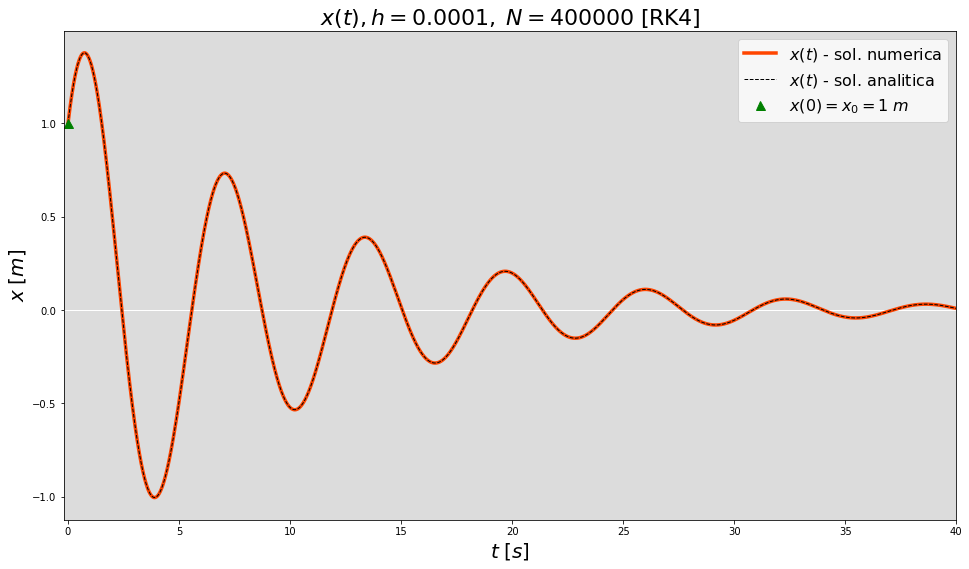

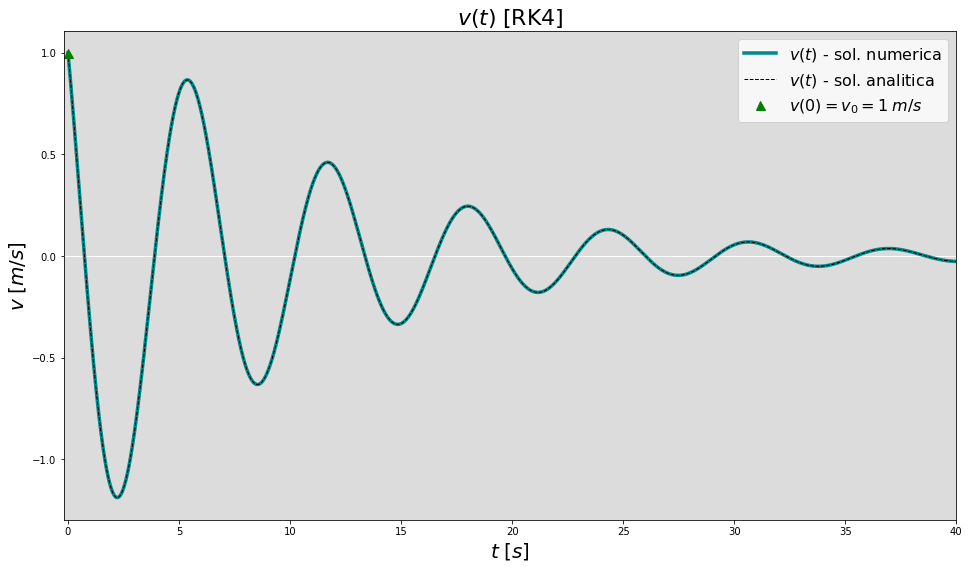

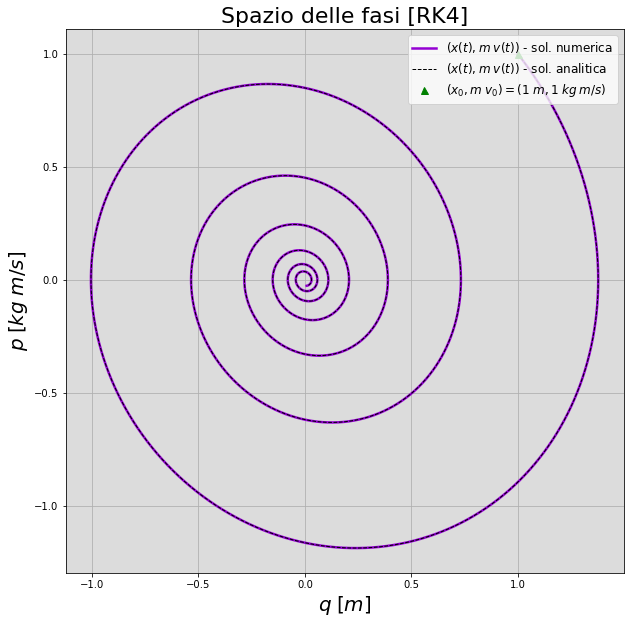

In [23]:
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$x(t), h = '+str(round(h0,6))+', \; N = '+str(N)+'$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, x_array, 'orangered', lw=3.5, label=r'$x(t)$ - sol. numerica')
plt.plot(t_array, x_an_array, '--k', lw=1, label=r'$x(t)$ - sol. analitica')
plt.plot([0],[x0],'^ g', ms=9, label=r'$x(0) = x_0 = ' + str(round(x0,3)) + '\; m$')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel('$x \; [m]$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.show()


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$v(t)$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, v_array, 'darkcyan', lw=3.5, label=r'$v(t)$ - sol. numerica')
plt.plot(t_array, v_an_array, '--k', lw=1, label=r'$v(t)$ - sol. analitica')
plt.plot([0],[v0],'^ g', ms=9, label=r'$v(0) = v_0 = ' + str(round(v0,3))+'\; m/s $')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel('$v \; [m/s]$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.show()


plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Spazio delle fasi [RK4]', size=22)

plt.plot(x_array, m*v_array, 'darkviolet', lw=2.5, label=r'$(x(t), m\; v(t))$ - sol. numerica')
plt.plot(x_an_array, m*v_an_array, '--k', lw=1, label=r'$(x(t), m\; v(t))$ - sol. analitica')
plt.plot([x0],[m*v0],'^ g', ms=7, label=r'$(x_0,m\; v_0) = (' +str(round(x0,3))+ '\;m,' + str(round(m*v0,3))+'\;kg\;m/s)$')

plt.xlabel('$q \; [m]$', size=20)
plt.ylabel('$p \; [kg \; m/s]$', size=20)
plt.legend(fontsize=12, loc='upper right')
plt.grid()
plt.show()

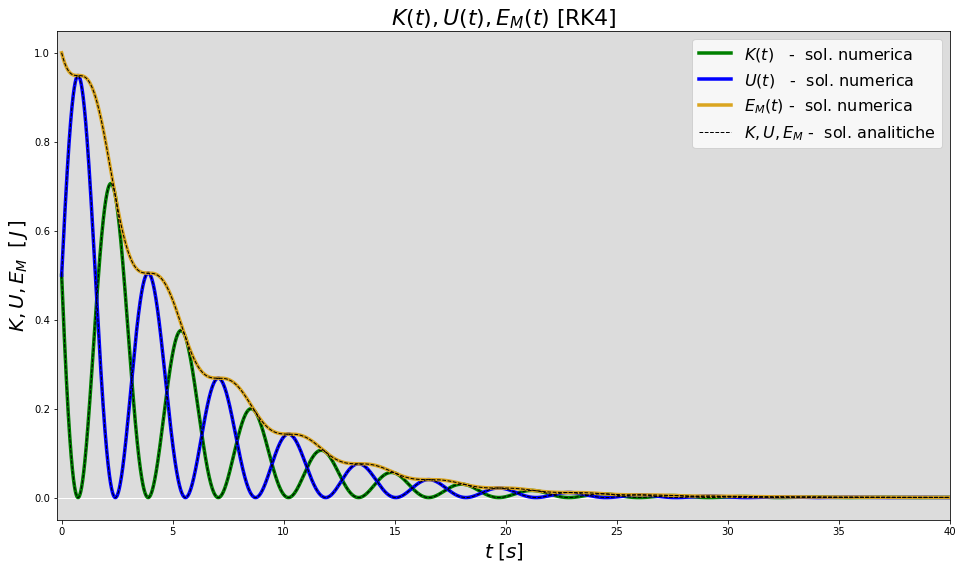

In [24]:
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$K(t), U(t), E_M(t)$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, K_array,   'green',      lw=3.5, label=r'$K(t)$   -  sol. numerica')
plt.plot(t_array, U_array,   'blue',       lw=3.5, label=r'$U(t)$   -  sol. numerica')
plt.plot(t_array, EM_array,  'goldenrod',  lw=3.5, label=r'$E_M(t)$ -  sol. numerica')
plt.plot(t_array, U_an_array,   '--k', lw=1, label=r'$K, U, E_M$ -  sol. analitiche')
plt.plot(t_array, K_an_array,   '--k', lw=1)
plt.plot(t_array, EM_an_array,  '--k', lw=1)

plt.xlabel('$t  \; [s]$', size=20)
plt.ylabel('$K,U,E_M \;\; [\,J\,]$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.show()

### Verifica del teorema dell'energia meccanica

Nell'oscillatore smorzato è chiaro che l'energia meccanica non si conservi: l'attrito viscoso è una forza non conservativa che compie lavoro negativo, quindi erode progressivamente tutta l'energia meccanica del sistema:

$\displaystyle E_M (t) \equiv K(t) + U(t) = \frac{mv^2(t) + k x^2(t)}{2} \\
 \displaystyle \lim_{t \rightarrow \infty} E_M(t) = 0$
 
Tuttavia, essendo nota l'espressione della forza d'attrito, è anche possibile trovarne una per il suo lavoro. In definitiva, si può verificare se vale il ***teorema dell'energia meccanica***:

$\displaystyle \Delta E_M = \mathcal{L}_{nc} \;\;\; \Leftrightarrow \;\;\; E_M(t) - E_M(0) = \mathcal{L}_{nc}(t) \;\;\; \Leftrightarrow \;\;\; E_M(0) = E_M(t) - \mathcal{L}_{nc}(t) = cost. \equiv \frac{mv_0^2 + kx_0^2}{2}$

essendo $\displaystyle \mathcal{L}_{nc}(t) = \int_0^t \vec{f}_{AV}(t') \cdot \vec{v}(t') \; dt' = -\beta \int_0^t v^2(t') \; dt'$ il lavoro compiuto dall'attrito fino all'istante $t$. Per testare la validità del teorema si possono rappresentare $E_M(t), -\mathcal{L}_{nc}(t)$ (quantità positiva) e la differenza $E_M(t) - \mathcal{L}_{nc}(t)$, per verificare se questa si mantiene uguale a $E_M(0)$.

In tutti e tre i casi, $v(t)$ si presenta come il prodotto di un esponenziale con un'altra funzione (combinazione di $\cos, \sin$ per il sottosmorzamento, lineare per lo smorzamento critico, combinazione di $\cosh, \sinh$ per il sovrasmorzamento); non è quindi possibile determinare analiticamente una primitiva di $v^2(t)$. Tuttavia, essendo nota $v(t)$ per punti (quindi $v^2(t)$), si può stimare la primitiva applicando iterativamente il metodo dei trapezi:

$\mathcal{L}_{nc}(0) \equiv 0 \\ \displaystyle \mathcal{L}_{nc}(t_k) = \left( \int_0^{t_{k-1}} + \int_{t_{k-1}}^{t_k} \right) \left[ -\beta \; v^2(t') \right] \; dt' = \mathcal{L}_{nc}(t_{k-1}) + \int_{t_{k-1}}^{t_k} - \beta \; v^2(t') \; dt' \sim \mathcal{L}_{nc}(t_{k-1}) - \beta \; \frac{t_{k} - t_{k-1}}{2} \; \left( v^2(t_k) + v^2(t_{k-1}) \right) $

ossia:

$\mathcal{L}_{nc}(0) \equiv 0 \\ \displaystyle \mathcal{L}_{nc}(t_k) \sim \mathcal{L}_{nc}(t_{k-1}) - \beta \; \frac{h}{2} \; \left( v^2(t_k) + v^2(t_{k-1}) \right) \;\;\;\; t_k = \frac{k}{N}T, \;\; k \in \{1, \cdots, N \}$

Nel programma, per comodità, è stata prima stimata la primitiva di $v^2(t)$ e dopo, moltiplicando per $-\beta$, l'array di $\mathcal{L}_{nc}(t)$.

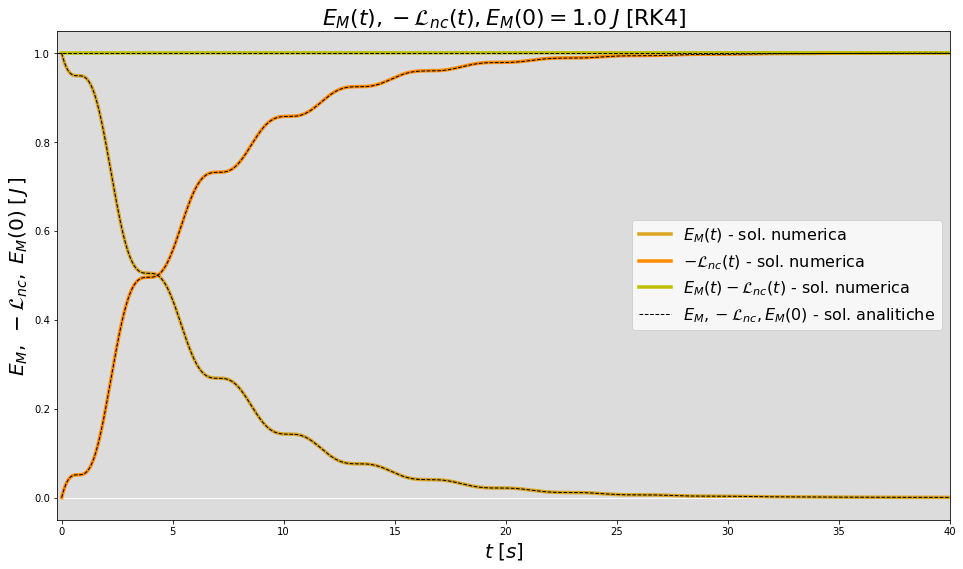

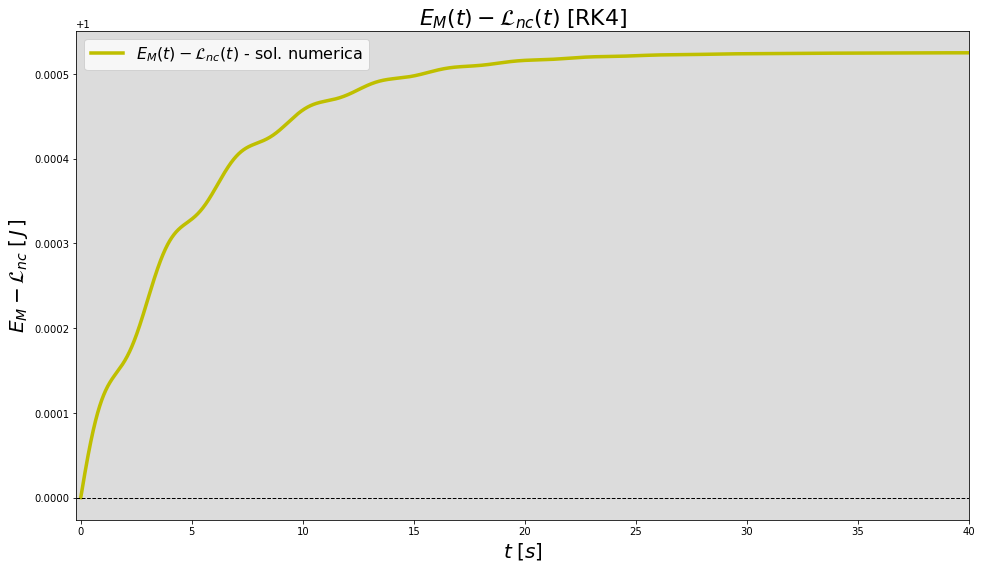

In [25]:
E0 = (m*v0**2 + k*x0**2)/2

Lnc_array    = np.append([0], np.empty(N))
Lnc_an_array = np.append([0], np.empty(N))

for j in range(1,N+1):
    Lnc_array[j]    = Lnc_array[j-1]    + h0/2 * (v_array[j-1]**2    + v_array[j]**2)
    Lnc_an_array[j] = Lnc_an_array[j-1] + h0/2 * (v_an_array[j-1]**2 + v_an_array[j]**2)

Lnc_array    *= -β
Lnc_an_array *= -β


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$E_M(t), -\mathcal{L}_{nc}(t), E_M(0)='+str(round(E0,3))+'\; J$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, EM_array,  'goldenrod',  lw=3.5, label=r'$E_M(t)$ - sol. numerica')
plt.plot(t_array, -Lnc_array,'darkorange', lw=3.5, label=r'$-\mathcal{L}_{nc}(t)$ - sol. numerica')
plt.plot(t_array, EM_array-Lnc_array, 'y', lw=3.5, label=r'$E_M(t) - \mathcal{L}_{nc}(t)$ - sol. numerica')
plt.plot(t_array, EM_an_array,  '--k',     lw=1, label=r'$E_M, -\mathcal{L}_{nc}, E_M(0)$ - sol. analitiche')
plt.plot(t_array, -Lnc_an_array, '--k',    lw=1)
plt.axhline(E0, c='k', ls='--',lw=1)

plt.xlabel('$t  \; [s]$', size=20)
plt.ylabel('$E_M, \; -\mathcal{L}_{nc}, \; E_M(0) \; [\,J\,]$', size=20)
plt.legend(fontsize=16, loc='center right')
plt.xlim(-.005*T,T)
plt.show()


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$E_M(t) - \mathcal{L}_{nc}(t)$ [RK4]', size=22)

plt.plot(t_array, EM_array-Lnc_array, 'y', lw=3.5, label=r'$E_M(t) - \mathcal{L}_{nc}(t)$ - sol. numerica')
plt.axhline(E0, c='k', ls='--',lw=1)

plt.xlabel('$t  \; [s]$', size=20)
plt.ylabel('$E_M - \mathcal{L}_{nc} \; [\,J\,]$', size=20)
plt.legend(fontsize=16)
plt.xlim(-.005*T,T)
plt.show()

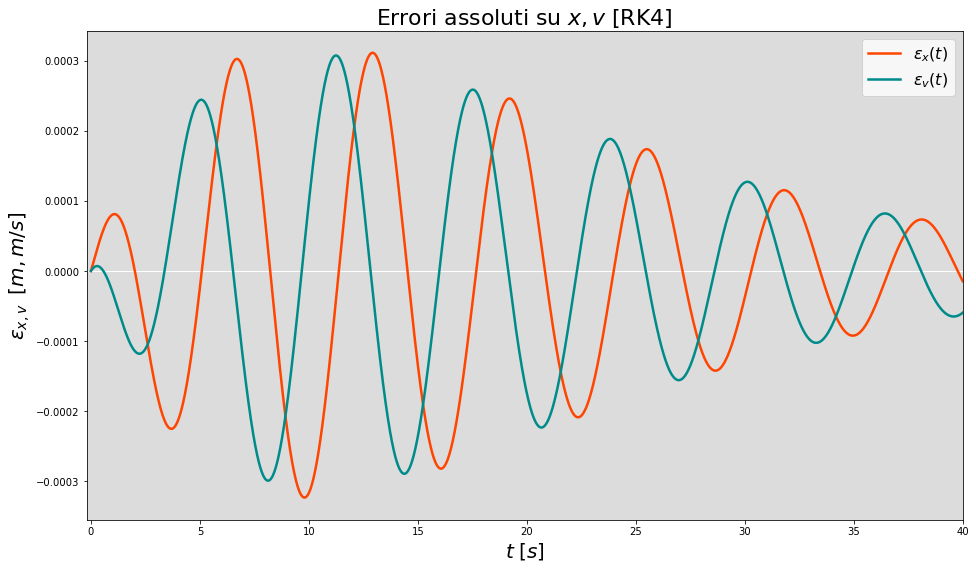

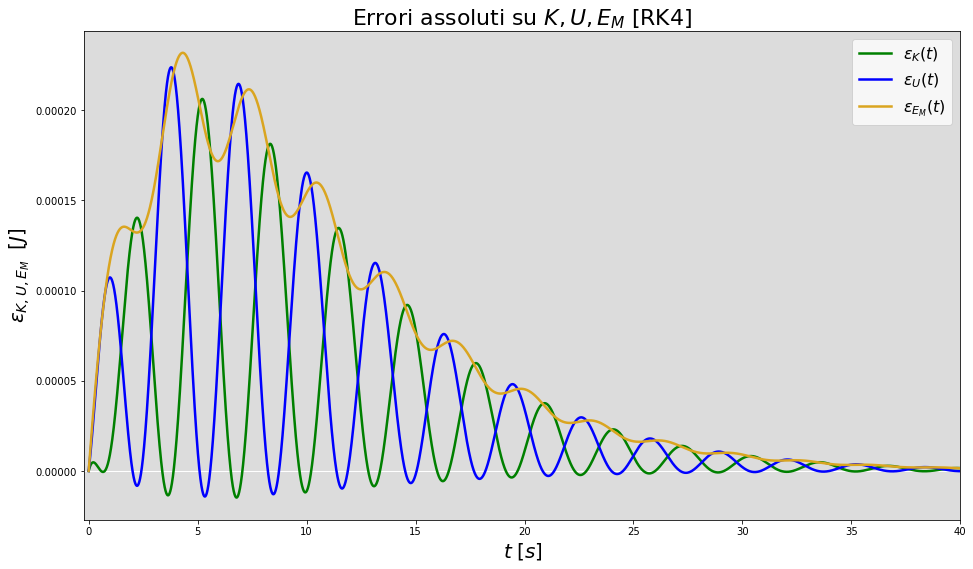

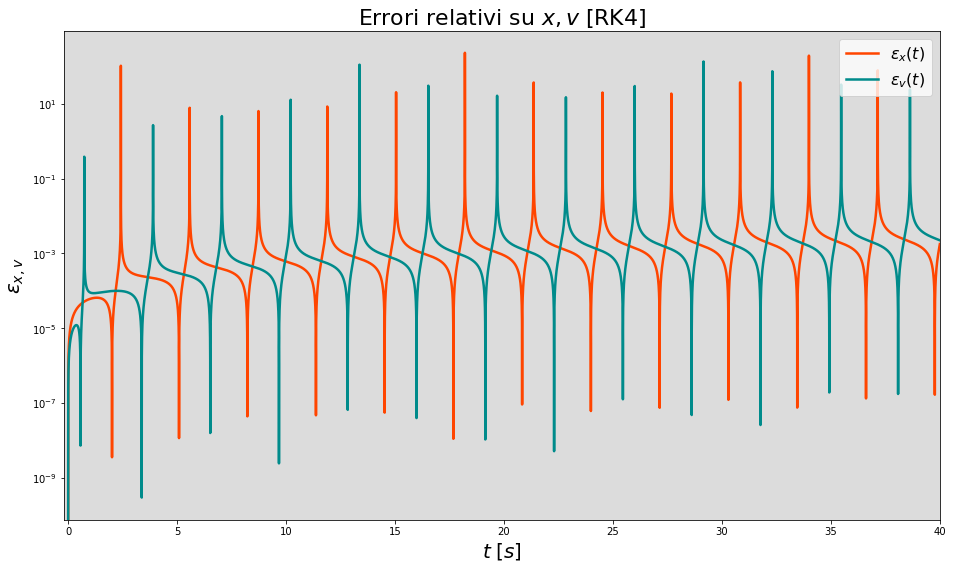

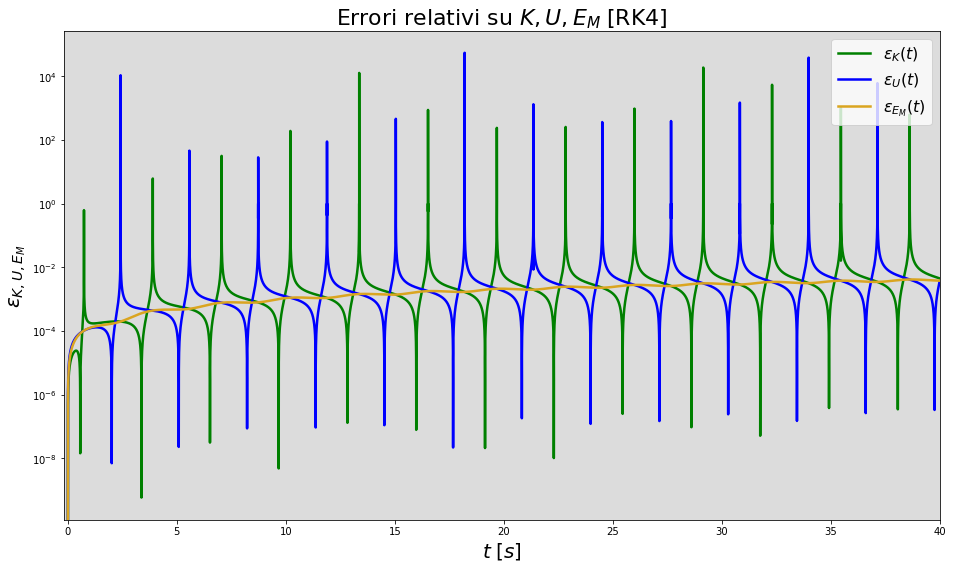

In [26]:
plt.figure(figsize=(15.7,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Errori assoluti su $x, v$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, Er_ass_x, 'orangered', lw=2.5, label=r'$\epsilon_x (t)$')
plt.plot(t_array, Er_ass_v, 'darkcyan' , lw=2.5, label=r'$\epsilon_v (t)$')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel(r'$\epsilon_{x,v} \;\; [m, m/s]$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.show()


plt.figure(figsize=(15.7,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Errori assoluti su $K, U, E_M$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, Er_ass_K,  'green',     lw=2.5, label=r'$\epsilon_K (t)$')
plt.plot(t_array, Er_ass_U,  'blue' ,     lw=2.5, label=r'$\epsilon_U (t)$')
plt.plot(t_array, Er_ass_EM, 'goldenrod', lw=2.5, label=r'$\epsilon_{E_M} (t)$')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel(r'$\epsilon_{K,U,E_{M}} \;\; [J]$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.show()



plt.figure(figsize=(15.7,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Errori relativi su $x, v$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, Er_rel_x, 'orangered', lw=2.5, label=r'$\epsilon_x (t)$')
plt.plot(t_array, Er_rel_v, 'darkcyan' , lw=2.5, label=r'$\epsilon_v (t)$')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel(r'$\epsilon_{x,v}$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.yscale('log')
plt.show()


plt.figure(figsize=(15.7,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Errori relativi su $K, U, E_M$ [RK4]', size=22)

plt.axhline(0, c='w', lw=1)
plt.plot(t_array, Er_rel_K,  'green',     lw=2.5, label=r'$\epsilon_K (t)$')
plt.plot(t_array, Er_rel_U,  'blue' ,     lw=2.5, label=r'$\epsilon_U (t)$')
plt.plot(t_array, Er_rel_EM, 'goldenrod', lw=2.5, label=r'$\epsilon_{E_M} (t)$')

plt.xlabel('$t \; [s]$', size=20)
plt.ylabel(r'$\epsilon_{K,U,E_{M}}$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(-.005*T,T)
plt.yscale('log')
plt.show()